In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
data = pd.read_csv("modified_concrete_data.csv")
data

,Mix_ID,Cement_kg_m3,SilicaFume_%_of_cement,GlassPowder_pct_of_sand,RCA_%_of_coarse,Water_Binder_ratio,Superplasticizer_%_of_binder,Max_Aggregate_size_mm,Fine_Aggregate_FM,RA_Water_Absorption_%,...,RCPT_coulombs,Chloride_Dapp_m2_per_s,Carbonation_Depth_mm,Drying_Shrinkage_28d_microstrain,Freeze_Thaw_MassLoss_%,Sulfate_Expansion_%,Total_Porosity_%,Critical_Pore_Diameter_um,ITZ_Thickness_um,Crack_Density_mm_per_mm2
0,1,312.4,0,0,0,0.500,0.787,25,2.24,NaN,...,122.1,4.280000e-12,5.2,334.6,0.80,0.107,21.14,8.632,27.4,0.022
1,2,485.2,0,0,10,0.582,0.947,20,2.39,6.12,...,363.9,3.550000e-12,18.6,413.1,4.54,0.134,21.40,6.096,3.3,1.636
2,3,419.6,5,2,0,0.566,1.709,40,3.03,NaN,...,174.0,3.620000e-12,13.5,786.0,0.90,0.255,5.47,5.744,43.2,1.477
3,4,379.6,0,0,0,0.354,0.680,25,2.97,NaN,...,106.7,1.340000e-12,16.1,334.4,0.20,0.168,17.17,4.413,9.4,0.282
4,5,246.8,5,0,0,0.352,1.739,20,2.55,NaN,...,140.7,4.800000e-12,1.0,536.9,2.94,0.228,8.77,4.633,18.6,0.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,227.5,0,2,0,0.614,1.369,25,2.47,NaN,...,313.4,1.910000e-12,8.1,668.3,0.77,0.316,15.87,1.534,16.5,0.651
996,997,475.2,10,0,0,0.342,1.006,25,2.41,NaN,...,273.4,4.110000e-12,0.8,219.3,0.84,0.187,13.30,2.476,2.5,0.289
997,998,241.0,0,0,0,0.415,1.530,40,2.66,NaN,...,388.6,4.850000e-12,13.5,613.9,4.95,0.454,6.68,1.691,31.0,0.513
998,999,485.1,0,0,0,0.586,0.971,20,3.11,NaN,...,215.6,2.290000e-12,19.4,248.2,2.26,0.017,16.52,6.743,31.0,0.513


In [3]:
pd.set_option("display.max_columns", None)
data.head()

,Mix_ID,Cement_kg_m3,SilicaFume_%_of_cement,GlassPowder_pct_of_sand,RCA_%_of_coarse,Water_Binder_ratio,Superplasticizer_%_of_binder,Max_Aggregate_size_mm,Fine_Aggregate_FM,RA_Water_Absorption_%,RA_Density_kg_m3,RA_Processing_or_Treatment,Curing_Age_days,Curing_Method,Slump_mm,Fresh_Density_kg_m3,AirContent_%,fc_MPa_7d,fc_MPa_28d,fc_MPa_56d,Ec_GPa,UPV_km_per_s,Water_Absorption_24h_%,Sorptivity_mm_per_sqrt_min,RCPT_coulombs,Chloride_Dapp_m2_per_s,Carbonation_Depth_mm,Drying_Shrinkage_28d_microstrain,Freeze_Thaw_MassLoss_%,Sulfate_Expansion_%,Total_Porosity_%,Critical_Pore_Diameter_um,ITZ_Thickness_um,Crack_Density_mm_per_mm2
0,1,312.4,0,0,0,0.500,0.787,25,2.24,NaN,NaN,NaN,28,Air,175.9,2129.3,3.00,30.74,42.71,47.12,41.36,4.141,3.49,0.218,122.1,4.280000e-12,5.2,334.6,0.80,0.107,21.14,8.632,27.4,0.022
1,2,485.2,0,0,10,0.582,0.947,20,2.39,6.12,2210.1,NaN,7,Water,22.7,2135.8,4.48,23.41,29.83,30.72,34.91,3.947,2.55,0.153,363.9,3.550000e-12,18.6,413.1,4.54,0.134,21.40,6.096,3.3,1.636
2,3,419.6,5,2,0,0.566,1.709,40,3.03,NaN,NaN,NaN,28,Water,171.6,2360.8,3.38,21.90,39.33,40.68,39.66,4.090,4.14,0.963,174.0,3.620000e-12,13.5,786.0,0.90,0.255,5.47,5.744,43.2,1.477
3,4,379.6,0,0,0,0.354,0.680,25,2.97,NaN,NaN,NaN,14,Air,79.0,2294.8,0.50,40.70,48.41,50.86,44.21,4.226,3.65,0.523,106.7,1.340000e-12,16.1,334.4,0.20,0.168,17.17,4.413,9.4,0.282
4,5,246.8,5,0,0,0.352,1.739,20,2.55,NaN,NaN,NaN,7,Water,21.6,2416.2,1.11,25.70,32.42,35.55,36.21,3.986,5.07,0.218,140.7,4.800000e-12,1.0,536.9,2.94,0.228,8.77,4.633,18.6,0.695


In [4]:
data = data.drop(['Fine_Aggregate_FM', 'Curing_Method', 'Fresh_Density_kg_m3', 'AirContent_%', 'fc_MPa_7d', 'fc_MPa_56d', 'Ec_GPa', 'UPV_km_per_s', 'RCPT_coulombs', 'Chloride_Dapp_m2_per_s', 
                  'Carbonation_Depth_mm', 'Drying_Shrinkage_28d_microstrain', 'Freeze_Thaw_MassLoss_%', 'Sulfate_Expansion_%', 'Total_Porosity_%', 'Critical_Pore_Diameter_um', 
                  'ITZ_Thickness_um', 'Crack_Density_mm_per_mm2', 'Sorptivity_mm_per_sqrt_min', 'Mix_ID', 'RA_Water_Absorption_%', 'RA_Density_kg_m3', 'RA_Processing_or_Treatment'], axis = 1)
data

,Cement_kg_m3,SilicaFume_%_of_cement,GlassPowder_pct_of_sand,RCA_%_of_coarse,Water_Binder_ratio,Superplasticizer_%_of_binder,Max_Aggregate_size_mm,Curing_Age_days,Slump_mm,fc_MPa_28d,Water_Absorption_24h_%
0,312.4,0,0,0,0.500,0.787,25,28,175.9,42.71,3.49
1,485.2,0,0,10,0.582,0.947,20,7,22.7,29.83,2.55
2,419.6,5,2,0,0.566,1.709,40,28,171.6,39.33,4.14
3,379.6,0,0,0,0.354,0.680,25,14,79.0,48.41,3.65
4,246.8,5,0,0,0.352,1.739,20,7,21.6,32.42,5.07
...,...,...,...,...,...,...,...,...,...,...,...
995,227.5,0,2,0,0.614,1.369,25,1,87.9,8.91,2.15
996,475.2,10,0,0,0.342,1.006,25,56,166.5,55.12,7.63
997,241.0,0,0,0,0.415,1.530,40,14,99.7,39.94,2.26
998,485.1,0,0,0,0.586,0.971,20,56,83.8,36.19,5.69


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cement_kg_m3                  1000 non-null   float64
 1   SilicaFume_%_of_cement        1000 non-null   int64  
 2   GlassPowder_pct_of_sand       1000 non-null   int64  
 3   RCA_%_of_coarse               1000 non-null   int64  
 4   Water_Binder_ratio            1000 non-null   float64
 5   Superplasticizer_%_of_binder  1000 non-null   float64
 6   Max_Aggregate_size_mm         1000 non-null   int64  
 7   Curing_Age_days               1000 non-null   int64  
 8   Slump_mm                      1000 non-null   float64
 9   fc_MPa_28d                    1000 non-null   float64
 10  Water_Absorption_24h_%        1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 86.1 KB


In [6]:
data.isnull().sum()

Cement_kg_m3                    0
SilicaFume_%_of_cement          0
GlassPowder_pct_of_sand         0
RCA_%_of_coarse                 0
Water_Binder_ratio              0
Superplasticizer_%_of_binder    0
Max_Aggregate_size_mm           0
Curing_Age_days                 0
Slump_mm                        0
fc_MPa_28d                      0
Water_Absorption_24h_%          0
dtype: int64

In [7]:
data = data.rename(columns = {
    'Cement_kg_m3' : 'Cement',
    'SilicaFume_%_of_cement' : 'SF_%',
    'GlassPowder_pct_of_sand' : 'GP_%',
    'RCA_%_of_coarse' : 'RCA_%',
    'Water_Binder_ratio' : 'W/B',
    'Superplasticizer_%_of_binder' : 'SP_%',
    'Max_Aggregate_size_mm' : 'Aggregate_size',
    'Curing_Age_days' : 'Curing_Age',
    'fc_MPa_28d' : 'Strength_28d',
    'Water_Absorption_24h_%' : 'WA_24h_%'
})
data.head()

,Cement,SF_%,GP_%,RCA_%,W/B,SP_%,Aggregate_size,Curing_Age,Slump_mm,Strength_28d,WA_24h_%
0,312.4,0,0,0,0.500,0.787,25,28,175.9,42.71,3.49
1,485.2,0,0,10,0.582,0.947,20,7,22.7,29.83,2.55
2,419.6,5,2,0,0.566,1.709,40,28,171.6,39.33,4.14
3,379.6,0,0,0,0.354,0.680,25,14,79.0,48.41,3.65
4,246.8,5,0,0,0.352,1.739,20,7,21.6,32.42,5.07


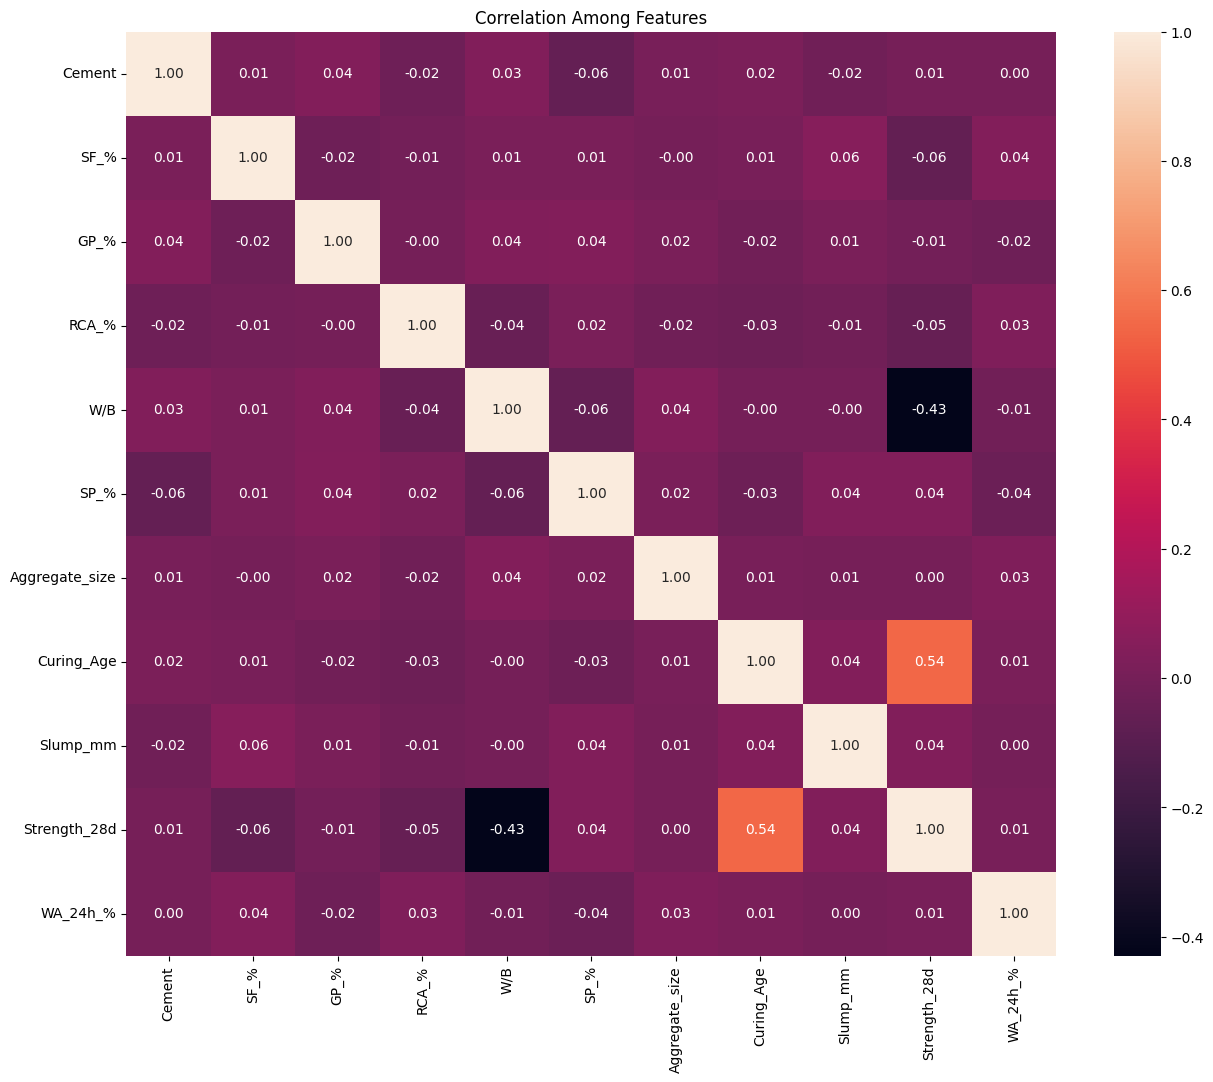

In [28]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True, fmt = '.2f')
plt.title("Correlation Among Features")
plt.show()

# Data Preprocessing

In [9]:
def preprocess_inputs(df):
    df = df.copy()

    y = df['Strength_28d'].copy()
    X = df.drop('Strength_28d', axis = 1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [11]:
X_train

,Cement,SF_%,GP_%,RCA_%,W/B,SP_%,Aggregate_size,Curing_Age,Slump_mm,WA_24h_%
0,0.378386,-0.565032,-0.359138,0.327683,0.073746,0.509367,1.750299,-1.032800,1.284500,0.060066
1,-1.401403,2.859405,-0.359138,-0.515619,1.313715,-0.136941,-0.542812,-0.701145,-0.405563,-1.096655
2,-0.139392,-0.565032,2.605448,-0.515619,0.202703,-0.184816,0.030466,-0.037836,0.408565,-0.674993
3,-1.379782,-0.565032,-0.359138,0.327683,0.361419,1.622452,-1.460056,1.288784,1.156626,-1.501222
4,0.766434,-0.565032,-0.359138,-0.515619,-0.888469,1.102670,1.750299,1.288784,1.001047,0.550106
...,...,...,...,...,...,...,...,...,...,...
695,-0.290742,-0.565032,0.826696,0.327683,1.631146,-0.456675,-0.542812,-0.037836,-0.373595,0.117048
696,1.071411,-0.565032,-0.359138,-0.515619,0.530055,-1.053398,-0.542812,-1.032800,-1.121656,0.191124
697,0.956476,1.147186,0.826696,0.327683,0.450697,-0.154039,-1.460056,1.288784,-0.639999,1.376335
698,0.701570,-0.565032,-0.359138,-0.515619,-0.749593,0.817132,0.030466,-0.037836,1.578609,-0.766163


In [12]:
X_train.mean()

Cement           -4.948423e-17
SF_%             -1.015061e-17
GP_%              5.075305e-18
RCA_%            -5.075305e-18
W/B               3.019807e-16
SP_%              8.628019e-17
Aggregate_size   -9.135549e-17
Curing_Age        2.030122e-17
Slump_mm         -2.030122e-17
WA_24h_%         -2.651847e-16
dtype: float64

In [13]:
X_train.var()

Cement            1.001431
SF_%              1.001431
GP_%              1.001431
RCA_%             1.001431
W/B               1.001431
SP_%              1.001431
Aggregate_size    1.001431
Curing_Age        1.001431
Slump_mm          1.001431
WA_24h_%          1.001431
dtype: float64

In [14]:
y_train

541    32.91
440    35.80
482    45.33
422    53.69
778    54.07
       ...  
106    42.50
270    36.48
860    52.62
435    52.09
102    38.93
Name: Strength_28d, Length: 700, dtype: float64

# Model Selection

In [15]:
Models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "Support Vector Machine (RBF Kernel)": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Neural Network": MLPRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada Boost": AdaBoostRegressor()
}

for name, model in Models.items():
    model.fit(X_train, y_train)
    print(name + " is trained.")

Linear Regression is trained.
Ridge Regression is trained.
Support Vector Machine (Linear Kernel) is trained.
Support Vector Machine (RBF Kernel) is trained.
Decision Tree is trained.


c:\Users\tanvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network is trained.
Random Forest is trained.
Gradient Boosting is trained.
Ada Boost is trained.


* Scoring of models

In [16]:
for name, model in Models.items():
    print("The score of {} model is: {:.3f}".format(name, model.score(X_test, y_test)))

The score of Linear Regression model is: 0.495
The score of Ridge Regression model is: 0.495
The score of Support Vector Machine (Linear Kernel) model is: 0.462
The score of Support Vector Machine (RBF Kernel) model is: 0.465
The score of Decision Tree model is: 0.679
The score of Neural Network model is: 0.221
The score of Random Forest model is: 0.794
The score of Gradient Boosting model is: 0.823
The score of Ada Boost model is: 0.809


In [17]:
# The best model is Gradient Boosting Model.

C:\Users\tanvi\AppData\Local\Temp\ipykernel_13256\2573556658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette = 'plasma')


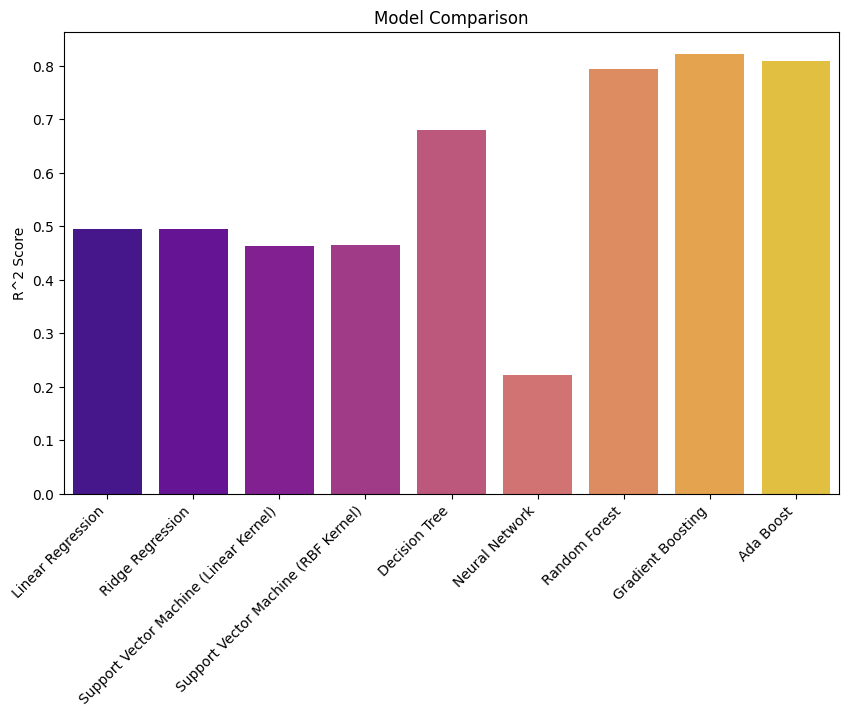

In [18]:
# Calculate R^2 scores for each model
scores = {name: model.score(X_test, y_test) for name, model in Models.items()}

### PLOT ADDED HERE: Model comparison bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette = 'plasma')
# There are more palette options in seaborn like 'coolwarm', 'plasma', 'inferno', 'magma', 'cividis', etc.
plt.xticks(rotation=45, ha="right")
plt.ylabel("R^2 Score")
plt.title("Model Comparison")
plt.show()

# Model Optimization

* Optimizing the best model with hyperparameters using GridSearchCV

In [19]:
best_model = GradientBoostingRegressor()

best_model.fit(X_train, y_train)

print("Gradient Boosting R^2 score before optimization: {:.3f}".format(best_model.score(X_test, y_test)))

Gradient Boosting R^2 score before optimization: 0.823


In [20]:
params = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5]
}

clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)
print("Best parameters found: ", clf.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [21]:
print("Gradient Boosting R^2 score after optimization: {:.3f}".format(clf.score(X_test, y_test)))

Gradient Boosting R^2 score after optimization: 0.822


In [22]:
# Predictions on test data
y_pred = clf.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

     Actual  Predicted
521   12.29  10.058723
737   43.67  47.394054
740   35.51  35.621282
660   46.13  47.068638
411   54.62  58.322765


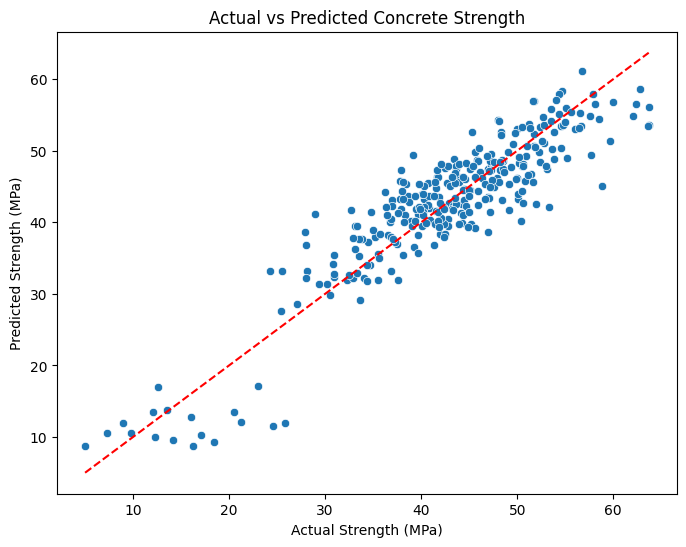

In [23]:
### PLOT ADDED HERE: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.show()

In [24]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

MAE: 3.424433267820885
MSE: 18.938736036424825
RMSE: 4.351865810939582
R^2: 0.8222269056576975


In [25]:
data.head()

,Cement,SF_%,GP_%,RCA_%,W/B,SP_%,Aggregate_size,Curing_Age,Slump_mm,Strength_28d,WA_24h_%
0,312.4,0,0,0,0.500,0.787,25,28,175.9,42.71,3.49
1,485.2,0,0,10,0.582,0.947,20,7,22.7,29.83,2.55
2,419.6,5,2,0,0.566,1.709,40,28,171.6,39.33,4.14
3,379.6,0,0,0,0.354,0.680,25,14,79.0,48.41,3.65
4,246.8,5,0,0,0.352,1.739,20,7,21.6,32.42,5.07


In [26]:
# dataset features are in this order:
# ['Cement', 'SF_%', 'GP_%', 'RCA_%', 'W/B', 'SP_%', 'Aggregate_size', 'Curing_Age', 'Slump_mm', 'WA_24h_%']

In [27]:
# Example new input (values must match the dataset order & scale)
new_mix = np.array([[300, 5, 2, 20, 0.5, 1.8, 20, 28, 80, 2.55]])

# Fit scaler on training data if not available
scaler = StandardScaler()
scaler.fit(X_train)

# Scale input using the fitted scaler
new_mix_scaled = scaler.transform(new_mix)

# Predict compressive strength
predicted_strength = clf.predict(new_mix_scaled)
print("Predicted Concrete Strength (MPa):", predicted_strength[0])

Predicted Concrete Strength (MPa): 45.47609060208413


c:\Users\tanvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tanvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
